In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import extract
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

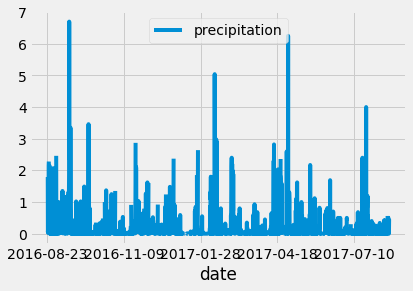

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database.
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

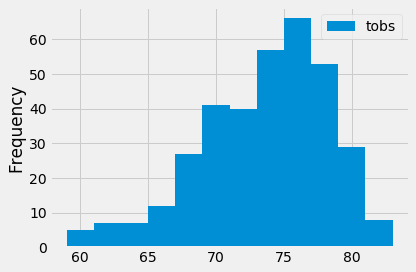

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [17]:
june_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.station).filter(extract('month', Measurement.date) == 6).all()
june_prcp

[('2010-06-01', 0.0, 'USC00519397'),
 ('2010-06-02', 0.01, 'USC00519397'),
 ('2010-06-03', 0.0, 'USC00519397'),
 ('2010-06-04', 0.0, 'USC00519397'),
 ('2010-06-05', 0.0, 'USC00519397'),
 ('2010-06-06', 0.0, 'USC00519397'),
 ('2010-06-07', 0.0, 'USC00519397'),
 ('2010-06-08', 0.0, 'USC00519397'),
 ('2010-06-09', 0.0, 'USC00519397'),
 ('2010-06-10', 0.0, 'USC00519397'),
 ('2010-06-11', 0.0, 'USC00519397'),
 ('2010-06-12', 0.0, 'USC00519397'),
 ('2010-06-13', 0.0, 'USC00519397'),
 ('2010-06-14', 0.0, 'USC00519397'),
 ('2010-06-15', 0.0, 'USC00519397'),
 ('2010-06-16', 0.0, 'USC00519397'),
 ('2010-06-17', 0.0, 'USC00519397'),
 ('2010-06-18', 0.0, 'USC00519397'),
 ('2010-06-19', 0.0, 'USC00519397'),
 ('2010-06-20', 0.0, 'USC00519397'),
 ('2010-06-21', 0.0, 'USC00519397'),
 ('2010-06-22', 0.0, 'USC00519397'),
 ('2010-06-23', 0.0, 'USC00519397'),
 ('2010-06-24', 0.0, 'USC00519397'),
 ('2010-06-25', 0.0, 'USC00519397'),
 ('2010-06-26', 0.02, 'USC00519397'),
 ('2010-06-27', 0.0, 'USC00519397'),

In [18]:
june_tobs = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(extract('month', Measurement.date) == 6).all()
june_tobs

[('2010-06-01', 78.0, 'USC00519397'),
 ('2010-06-02', 76.0, 'USC00519397'),
 ('2010-06-03', 78.0, 'USC00519397'),
 ('2010-06-04', 76.0, 'USC00519397'),
 ('2010-06-05', 77.0, 'USC00519397'),
 ('2010-06-06', 78.0, 'USC00519397'),
 ('2010-06-07', 77.0, 'USC00519397'),
 ('2010-06-08', 78.0, 'USC00519397'),
 ('2010-06-09', 78.0, 'USC00519397'),
 ('2010-06-10', 79.0, 'USC00519397'),
 ('2010-06-11', 78.0, 'USC00519397'),
 ('2010-06-12', 78.0, 'USC00519397'),
 ('2010-06-13', 78.0, 'USC00519397'),
 ('2010-06-14', 77.0, 'USC00519397'),
 ('2010-06-15', 78.0, 'USC00519397'),
 ('2010-06-16', 78.0, 'USC00519397'),
 ('2010-06-17', 77.0, 'USC00519397'),
 ('2010-06-18', 77.0, 'USC00519397'),
 ('2010-06-19', 82.0, 'USC00519397'),
 ('2010-06-20', 78.0, 'USC00519397'),
 ('2010-06-21', 78.0, 'USC00519397'),
 ('2010-06-22', 78.0, 'USC00519397'),
 ('2010-06-23', 78.0, 'USC00519397'),
 ('2010-06-24', 78.0, 'USC00519397'),
 ('2010-06-25', 77.0, 'USC00519397'),
 ('2010-06-26', 76.0, 'USC00519397'),
 ('2010-06-2

In [19]:
dec_prcp = session.query(Measurement.date, Measurement.prcp, Measurement.station).filter(extract('month', Measurement.date) == 12).all()
dec_prcp

[('2010-12-01', 0.04, 'USC00519397'),
 ('2010-12-03', 0.0, 'USC00519397'),
 ('2010-12-04', 0.0, 'USC00519397'),
 ('2010-12-06', 0.0, 'USC00519397'),
 ('2010-12-07', 0.0, 'USC00519397'),
 ('2010-12-08', 0.0, 'USC00519397'),
 ('2010-12-09', 0.0, 'USC00519397'),
 ('2010-12-10', 1.58, 'USC00519397'),
 ('2010-12-11', 0.77, 'USC00519397'),
 ('2010-12-12', 0.0, 'USC00519397'),
 ('2010-12-13', 0.0, 'USC00519397'),
 ('2010-12-14', 0.0, 'USC00519397'),
 ('2010-12-15', 0.0, 'USC00519397'),
 ('2010-12-16', 0.0, 'USC00519397'),
 ('2010-12-17', 0.0, 'USC00519397'),
 ('2010-12-18', 0.0, 'USC00519397'),
 ('2010-12-19', 1.4, 'USC00519397'),
 ('2010-12-23', 0.0, 'USC00519397'),
 ('2010-12-24', 0.0, 'USC00519397'),
 ('2010-12-26', None, 'USC00519397'),
 ('2010-12-27', 0.13, 'USC00519397'),
 ('2010-12-28', 0.55, 'USC00519397'),
 ('2010-12-29', 0.06, 'USC00519397'),
 ('2010-12-30', 0.01, 'USC00519397'),
 ('2010-12-31', 0.0, 'USC00519397'),
 ('2011-12-01', 0.03, 'USC00519397'),
 ('2011-12-02', 0.08, 'USC005

In [20]:
dec_tobs = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(extract('month', Measurement.date) == 12).all()
dec_tobs

[('2010-12-01', 76.0, 'USC00519397'),
 ('2010-12-03', 74.0, 'USC00519397'),
 ('2010-12-04', 74.0, 'USC00519397'),
 ('2010-12-06', 64.0, 'USC00519397'),
 ('2010-12-07', 64.0, 'USC00519397'),
 ('2010-12-08', 67.0, 'USC00519397'),
 ('2010-12-09', 77.0, 'USC00519397'),
 ('2010-12-10', 66.0, 'USC00519397'),
 ('2010-12-11', 69.0, 'USC00519397'),
 ('2010-12-12', 68.0, 'USC00519397'),
 ('2010-12-13', 68.0, 'USC00519397'),
 ('2010-12-14', 71.0, 'USC00519397'),
 ('2010-12-15', 74.0, 'USC00519397'),
 ('2010-12-16', 67.0, 'USC00519397'),
 ('2010-12-17', 66.0, 'USC00519397'),
 ('2010-12-18', 69.0, 'USC00519397'),
 ('2010-12-19', 71.0, 'USC00519397'),
 ('2010-12-23', 70.0, 'USC00519397'),
 ('2010-12-24', 70.0, 'USC00519397'),
 ('2010-12-26', 74.0, 'USC00519397'),
 ('2010-12-27', 74.0, 'USC00519397'),
 ('2010-12-28', 71.0, 'USC00519397'),
 ('2010-12-29', 75.0, 'USC00519397'),
 ('2010-12-30', 75.0, 'USC00519397'),
 ('2010-12-31', 72.0, 'USC00519397'),
 ('2011-12-01', 69.0, 'USC00519397'),
 ('2011-12-0

In [21]:
june_prcp_df = pd.DataFrame(june_prcp, columns=['Date','Precip (Jun)', 'Station'])
june_prcp_df.describe()

,Precip (Jun)
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [22]:
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['Date','Precip (Dec)', 'Station'])
dec_prcp_df.describe()

,Precip (Dec)
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [23]:
prcp_df = june_prcp_df.merge(dec_prcp_df, how='outer', sort=True)
prcp_df.describe()

,Precip (Jun),Precip (Dec)
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


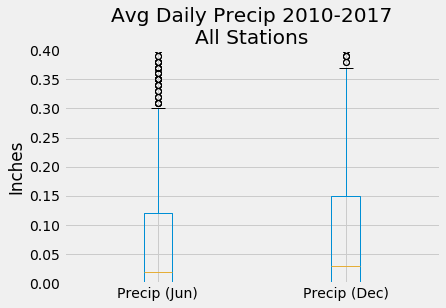

In [24]:
fig, ax = plt.subplots()
ax.set_ylim(0,0.4)
ax.set_ylabel('Inches')
plt.title('Avg Daily Precip 2010-2017\nAll Stations')
prcp_df.boxplot()

In [25]:
june_temp_df = pd.DataFrame(june_tobs, columns=['Date','Temp (Jun)', 'Station'])
june_temp_df.describe()

,Temp (Jun)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [26]:
dec_temp_df = pd.DataFrame(dec_tobs, columns=['Date','Temp (Dec)', 'Station'])
dec_temp_df.describe()

,Temp (Dec)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [27]:
temp_df = june_temp_df.merge(dec_temp_df, how='outer', sort=True)
temp_df.describe()

,Temp (Jun),Temp (Dec)
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


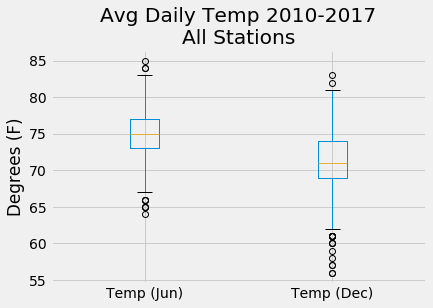

In [28]:
fig, ax = plt.subplots()
ax.set_ylabel('Degrees (F)')
plt.title('Avg Daily Temp 2010-2017\nAll Stations')
temp_df.boxplot()